In [2]:
%matplotlib inline
import numpy as np
from numpy import array

from math import ceil

from matplotlib import pylab as plt  
from matplotlib.pyplot import imshow

from pylab import imread

import skimage
from skimage import morphology, measure, draw, feature, exposure
from skimage.color import rgb2hsv, rgb2gray
from skimage.morphology import square
from skimage.feature import canny
from skimage.filters import sobel
from skimage.segmentation import watershed

import cv2

from scipy import ndimage as ndi

In [30]:
def show_array(arr, cols=3):
    "Show a mosaic of images list and save it to jpg"
    rows = ceil(len(arr)/cols)
    plt.figure(figsize=(cols*30,rows*20))
    
    for i,img in enumerate(arr):
        ax = plt.subplot(rows, cols, i+1)
        ax.set_xticks([])
        ax.set_yticks([])
        imshow(img, cmap='gray')
#     plt.savefig("tramwaje")

def show(*args):
    """Show multiple images in a row"""
    plt.figure(figsize=(20,12))
    for i,img in enumerate(args):
        plt.subplot(1, len(args), i+1)
        imshow(img, cmap='gray')
    
def get_hsv_param(img, param = 1):
    """Return h/s/v for each pixel"""
    # param: 0 - hue, 1 - sat, 2 - value
    img_sat = []
    for row in rgb2hsv(img):
        temp = []
        for col in row:
            temp.append(col[param])
        img_sat.append(temp)
    img_sat = np.array(img_sat)
    return img_sat

def oranges(img, low_treshold, high_treshold):
    img_oranges = []
    for row in rgb2hsv(img):
        temp = []
        for col in row:
            hue = col[0]
            if (hue > low_treshold and hue < high_treshold): 
                temp.append(1)
            else: 
                temp.append(0)
        img_oranges.append(temp)
    return img_oranges

In [4]:
tram_names = ["1_02", "2_01", "4_03", "4_04","5_07","5_12","6_02"]
tram = "5_07"
tram = "4_04"
imgs = []

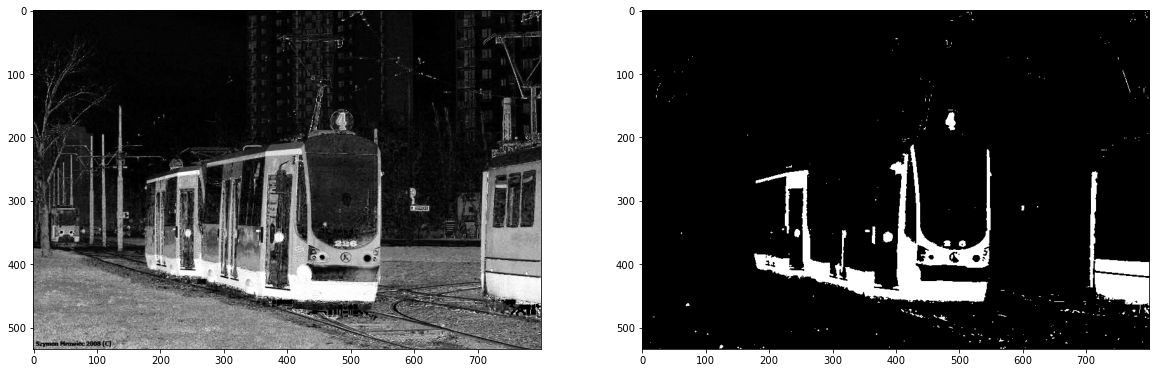

In [32]:
imgs = []
canny_low = 0.8*255
canny_high = 255

# for tram in tram_names:
# Read image
img = imread("dane/"+tram+".jpg")
# img_sat = np.uint8(get_saturation(img)*255)
img_sat = get_hsv_param(img, 1)
# edges = canny(img_sat, low_threshold=0.8)
# edges = cv2.Canny(img_sat, canny_low, canny_high) //bad performance

elevation_map = sobel(img_sat)
# show(elevation_map)

markers = np.zeros_like(img_sat)
markers[img_sat < 0.4] = 1
markers[img_sat > 0.95] = 2

segmentation = watershed(elevation_map, markers)

show(img_sat, segmentation)

# contour_info = [(c, cv2.contourArea(c),) for c in cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)[1]]
# contour_info
# fill_img = ndi.binary_fill_holes(edges)
# imgs.append(img_sat)
# show_array(imgs + [fill_img])

In [ ]:
hist, hist_centers = exposure.histogram(img_sat)
plt.plot(hist_centers, hist)

#todo:
to samo na kanale koloru. Czerwonego? Pomarańczowego?

0.9977477477477478 0.0


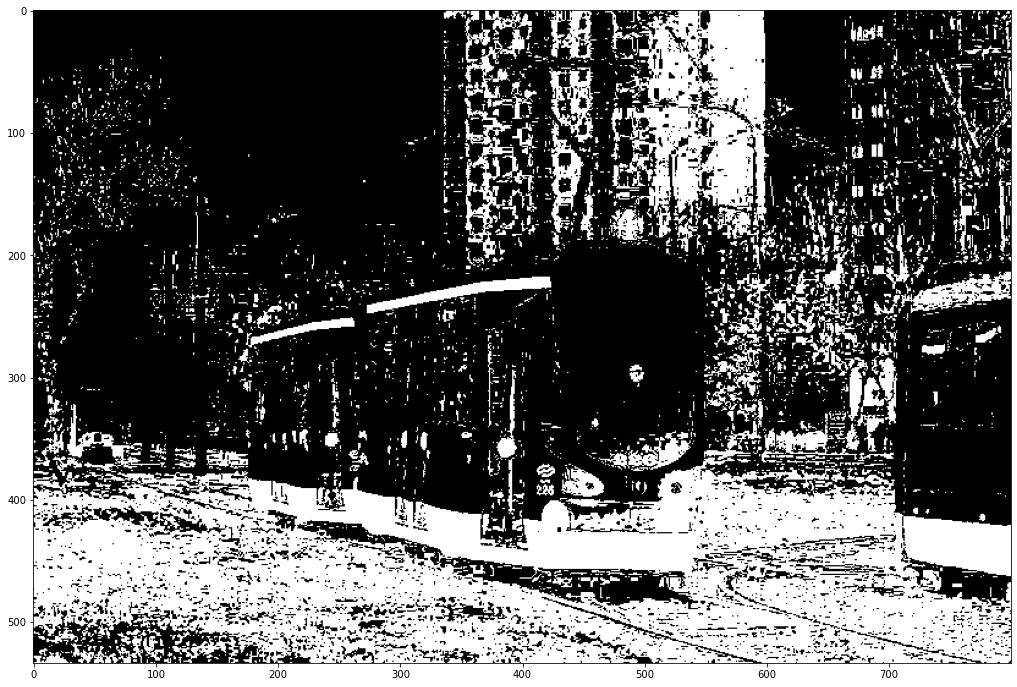

In [34]:
imgs = []
# for tram in tram_names:
img = imread("dane/"+tram+".jpg")
img_hue = get_hsv_param(img, 0)

elevation_map = sobel(img_hue)
# show(elevation_map)

print(img_hue.max(), img_hue.min())

markers = np.zeros_like(img_hue)
show(oranges(img, 10/360, 70/360))

# markers[img_hue < 10/360] = 1
# markers[img_hue > 60/360] = 2
# markers[np.logical_and((img_hue > 20/360), (img_hue < 50/360))] = 3
# segmentation = watershed(elevation_map, markers)
